In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import spacy
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from wordcloud import WordCloud
from nltk.corpus import stopwords
import seaborn as sns

## Geographic Distribution of Shipments

In [2]:
geo_location=pd.read_csv("C:\olist_geolocation_dataset.csv")
geo_location

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\mabeteng\AppData\Local\Temp\ipykernel_984\3999216263.py:1: SyntaxWarning: invalid escape sequence '\o'
  geo_location=pd.read_csv("C:\olist_geolocation_dataset.csv")


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
3              sao paulo                SP  
4              sao paulo                SP  
...                  ...               ...  
1000158         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000161  david canabarro                RS  
1000162         tapejara                RS  

[1000163 rows x 5 columns]

In [3]:
#loading the data
df1=pd.read_csv("C:\df1.csv")
df1_final = pd.read_csv("C:\df1_final.csv")


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\mabeteng\AppData\Local\Temp\ipykernel_984\2782639777.py:2: SyntaxWarning: invalid escape sequence '\d'
  df1=pd.read_csv("C:\df1.csv")
C:\Users\mabeteng\AppData\Local\Temp\ipykernel_984\2782639777.py:3: SyntaxWarning: invalid escape sequence '\d'
  df1_final = pd.read_csv("C:\df1_final.csv")
C:\Users\mabeteng\AppData\Local\Temp\ipykernel_984\2782639777.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("C:\df1.csv")


In [4]:
df1_final.describe()

geolocation_lat  geolocation_lng         price   customer_id  \
count     14820.000000     14820.000000  1.482000e+04  14820.000000   
mean        -19.798765       -46.120654  9.597012e+04    793.363090   
std           6.871172         4.861273  3.615155e+05   2872.860419   
min         -33.690729       -72.670621  1.062000e+01      1.000000   
25%         -23.582506       -48.824944  2.966325e+03     32.000000   
50%         -22.810403       -46.640522  1.394042e+04    132.000000   
75%         -16.400728       -43.429324  6.074033e+04    520.000000   
max          42.184003        -8.723762  1.073093e+07  75563.000000   

          frequency  
count  14820.000000  
mean     793.363090  
std     2872.860419  
min        1.000000  
25%       32.000000  
50%      132.000000  
75%      520.000000  
max    75563.000000

In [5]:
token = 'pk.eyJ1IjoibWFiZWw5OSIsImEiOiJjbHhiamR4NjQzNXY3MmpzOWZkMDFyYncyIn0.pk7_sU8JguXwP1SFdfmYAw'
px.set_mapbox_access_token(token)
fig = px.scatter_mapbox(df1_final,
                        lat="geolocation_lat",
                        lon="geolocation_lng",
                        size="frequency",
                        color="frequency",
                        color_continuous_scale=px.colors.sequential.Agsunset,
                        zoom=5,
                        size_max= 20,
                        title='Market Distribution of Shipments')
fig.update_layout(mapbox_style='outdoors')

fig.show()

Market distribution is more condensed in Southwest Brazil approximately at lat:-22,-23 and lng:-43,-46

In [6]:
fig = px.density_mapbox(df1_final, lat='geolocation_lat', lon='geolocation_lng', z='price', radius=10,
                        center=dict(lat=0, lon=180), zoom=1,
                        mapbox_style="open-street-map",
                        title="Order Revenue Distribution")
fig.show()

Three main hotspots with high revenue at approximately:
1. lat:-23, lng:-46
2. lat:-22, lng: -43
3. lat:-19, lng: -43


In [7]:
fig = px.density_mapbox(df1_final, lat='geolocation_lat', lon='geolocation_lng', z='customer_id', radius=10,
                        center=dict(lat=0, lon=180), zoom=1,
                        mapbox_style="open-street-map", title="Geographic Customer Distribution")
fig.show()

Three main hotspots with high concentration of customers at approximately:
1. lat:-23, lng:-46
2. lat:-22, lng: -43
3. lat:-19, lng: -43


The coordinates of these hotspots for customer and revenue distribution are similar, which is logical because a higher concentration of customers naturally corresponds to higher revenue.

## Delivery-time forecast exploration

In [8]:
df2=pd.read_csv("C:\df2.csv")
df2.head(10)

<>:1: SyntaxWarning:

invalid escape sequence '\d'

<>:1: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\mabeteng\AppData\Local\Temp\ipykernel_984\2636863096.py:1: SyntaxWarning:

invalid escape sequence '\d'



order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
3  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
4  bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
5  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
6  40c5e18f7d112b59b3e5113a59a905b3  67407057a7d5ee17d1cd09523f484d13   
7  86674ccaee19790309333210917b2c7d  1b338293f35549b5e480b9a3d7bbf3cd   
8  f913d229653fdd809c249ed98ab6b754  e1365d7b227b247b6bc0931771885eaf   
9  9b85bbefeeacfebc3ff603d20511734f  7f4f07b97783e894fccff9d72e0988b3   

  order_status order_purchase_timestamp order_delivered_customer_date  \
0    delivered      2017-10-02 10:56:33           2017-10-10 21:25:13   
1    delivered      2017-10-02 10:56:33           2017-10-10 21:25:13   
2    delivered      2017-08-15 18:29:31           2017-08-18 14:44:43   
3    delivered      2017-08-02 18:24:47           2017-08-07 18:30:01   
4    delivered      2017-10-23 23:26:46           2017-11-07 18:04:59   
5    delivered      2018-07-24 20:41:37           2018-08-07 15:27:45   
6    delivered      2018-06-11 10:25:52           2018-06-19 00:31:13   
7    delivered      2018-08-09 11:37:35           2018-08-14 18:51:47   
8    delivered      2018-04-30 02:18:32           2018-05-08 17:53:51   
9    delivered      2017-11-27 10:32:51           2017-12-07 19:48:32   

  delivery_timeframe  order_item_id                        product_id   price  \
0                7.0              1  87285b34884572647811a353c7ac498a   29.99   
1                7.0              1  87285b34884572647811a353c7ac498a   29.99   
2                9.0              1  87285b34884572647811a353c7ac498a   29.99   
3                7.0              1  87285b34884572647811a353c7ac498a   29.99   
4                5.0              1  87285b34884572647811a353c7ac498a   29.99   
5                5.0              1  595fac2a385ac33a80bd5114aec74eb8  118.70   
6               26.0              1  595fac2a385ac33a80bd5114aec74eb8  119.90   
7                7.0              1  595fac2a385ac33a80bd5114aec74eb8  116.90   
8               15.0              1  595fac2a385ac33a80bd5114aec74eb8  119.90   
9               12.0              1  595fac2a385ac33a80bd5114aec74eb8  109.90   

  product_category payment_type                         review_id  \
0       housewares  credit_card  a54f0611adc9ed256b57ede6b6eb5114   
1       housewares      voucher  a54f0611adc9ed256b57ede6b6eb5114   
2       housewares  credit_card  b46f1e34512b0f4c74a72398b03ca788   
3       housewares  credit_card  dc90f19c2806f1abba9e72ad3c350073   
4       housewares       boleto  1bafb430e498b939f258b9c9dbdff9b1   
5        perfumery       boleto  8d5266042046a06655c8db133d120ba5   
6        perfumery  credit_card  87bed0b5fb6856c9328d5e60df70546a   
7        perfumery  credit_card  ebd3c6f3c54ee7cbdecefd57d5d57d1e   
8        perfumery  credit_card  ff25eee85259b7a0991f9643a0b6dc34   
9        perfumery  credit_card  5b69733d319d27b831959367ad30845f   

   review_score                                     review_comment  \
0             4  I haven't tested the product yet, but it arriv...   
1             4  I haven't tested the product yet, but it arriv...   
2             4  They should package the product better. The bo...   
3             5  I only found it small for six cups, but it's a...   
4             3                                            Unknown   
5             4                          The product is very good.   
6             5          Delivery before the scheduled date. Great   
7             5                                     I am satisfied   
8             5                               Once again satisfied   
9             5                       Very good purchase, on time. 

In [9]:
df2.review_type.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [10]:
df2.describe()

order_item_id          price   review_score
count  113181.000000  113181.000000  113181.000000
mean        1.195227     120.319206       4.035403
std         0.689227     181.622974       1.384714
min         1.000000       0.850000       1.000000
25%         1.000000      39.900000       4.000000
50%         1.000000      74.900000       5.000000
75%         1.000000     134.900000       5.000000
max        21.000000    6735.000000       5.000000

In [11]:
order_delivered=df2.groupby('order_status').get_group('delivered')
order_delivered

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
3       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
4       bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
...                                  ...                               ...   
113176  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
113177  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
113178  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
113179  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
113180  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp order_delivered_customer_date  \
0         delivered      2017-10-02 10:56:33           2017-10-10 21:25:13   
1         delivered      2017-10-02 10:56:33           2017-10-10 21:25:13   
2         delivered      2017-08-15 18:29:31           2017-08-18 14:44:43   
3         delivered      2017-08-02 18:24:47           2017-08-07 18:30:01   
4         delivered      2017-10-23 23:26:46           2017-11-07 18:04:59   
...             ...                      ...                           ...   
113176    delivered      2017-08-10 21:21:07           2017-08-23 15:36:29   
113177    delivered      2017-08-10 21:21:07           2017-08-23 15:36:29   
113178    delivered      2017-12-20 09:52:41           2018-01-26 15:45:14   
113179    delivered      2017-03-09 09:54:05           2017-03-17 15:08:01   
113180    delivered      2018-03-08 20:57:30           2018-03-16 13:08:30   

       delivery_timeframe  order_item_id                        product_id  \
0                     7.0              1  87285b34884572647811a353c7ac498a   
1                     7.0              1  87285b34884572647811a353c7ac498a   
2                     9.0              1  87285b34884572647811a353c7ac498a   
3                     7.0              1  87285b34884572647811a353c7ac498a   
4                     5.0              1  87285b34884572647811a353c7ac498a   
...                   ...            ...                               ...   
113176                7.0              1  0df37da38a30a713453b03053d60d3f7   
113177                7.0              2  0df37da38a30a713453b03053d60d3f7   
113178               -9.0              1  3d2c44374ee42b3003a470f3e937a2ea   
113179               10.0              1  ac35486adb7b02598c182c2ff2e05254   
113180               17.0              1  006619bbed68b000c8ba3f8725d5409e   

         price     product_category payment_type  \
0        29.99           housewares  credit_card   
1        29.99           housewares      voucher   
2        29.99           housewares  credit_card   
3        29.99           housewares  credit_card   
4        29.99           housewares       boleto   
...        ...                  ...          ...   
113176  356.00       sports_leisure  credit_card   
113177  356.00       sports_leisure  credit_card   
113178   55.90  musical_instruments  credit_card   
113179   72.00        health_beauty  credit_card   
113180   68.50        health_beauty   debit_card   

                               review_id  review_score  \
0       a54f0611adc9ed256b57ede6b6eb5114             4   
1       a54f0611adc9ed256b57ede6b6eb5114             4   
2       b46f1e34512b0f4c74a72398b03ca788             4   
3       dc90f19c2806f1abba9e72ad3c350073             5   
4       1bafb430e498b939f258b9c9dbdff9b1             3   
...                                  ...           ...   
113176  f5453b3d33358ed459eb4312392b96a8             4   
113177  f5453b3d33358ed459eb4312392b96a8             4   
113178  8ea780895f362ce949029f95b7181ff0             1   
113179  e262b3f9

In [12]:
order_delivered['delivery_timeframe']=pd.to_numeric(order_delivered['delivery_timeframe'],errors='coerce')
order_delivered

C:\Users\mabeteng\AppData\Local\Temp\ipykernel_984\664348720.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
3       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
4       bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
...                                  ...                               ...   
113176  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
113177  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
113178  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
113179  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
113180  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp order_delivered_customer_date  \
0         delivered      2017-10-02 10:56:33           2017-10-10 21:25:13   
1         delivered      2017-10-02 10:56:33           2017-10-10 21:25:13   
2         delivered      2017-08-15 18:29:31           2017-08-18 14:44:43   
3         delivered      2017-08-02 18:24:47           2017-08-07 18:30:01   
4         delivered      2017-10-23 23:26:46           2017-11-07 18:04:59   
...             ...                      ...                           ...   
113176    delivered      2017-08-10 21:21:07           2017-08-23 15:36:29   
113177    delivered      2017-08-10 21:21:07           2017-08-23 15:36:29   
113178    delivered      2017-12-20 09:52:41           2018-01-26 15:45:14   
113179    delivered      2017-03-09 09:54:05           2017-03-17 15:08:01   
113180    delivered      2018-03-08 20:57:30           2018-03-16 13:08:30   

        delivery_timeframe  order_item_id                        product_id  \
0                      7.0              1  87285b34884572647811a353c7ac498a   
1                      7.0              1  87285b34884572647811a353c7ac498a   
2                      9.0              1  87285b34884572647811a353c7ac498a   
3                      7.0              1  87285b34884572647811a353c7ac498a   
4                      5.0              1  87285b34884572647811a353c7ac498a   
...                    ...            ...                               ...   
113176                 7.0              1  0df37da38a30a713453b03053d60d3f7   
113177                 7.0              2  0df37da38a30a713453b03053d60d3f7   
113178                -9.0              1  3d2c44374ee42b3003a470f3e937a2ea   
113179                10.0              1  ac35486adb7b02598c182c2ff2e05254   
113180                17.0              1  006619bbed68b000c8ba3f8725d5409e   

         price     product_category payment_type  \
0        29.99           housewares  credit_card   
1        29.99           housewares      voucher   
2        29.99           housewares  credit_card   
3        29.99           housewares  credit_card   
4        29.99           housewares       boleto   
...        ...                  ...          ...   
113176  356.00       sports_leisure  credit_card   
113177  356.00       sports_leisure  credit_card   
113178   55.90  musical_instruments  credit_card   
113179   72.00        health_beauty  credit_card   
113180   68.50        health_beauty   debit_card   

                               review_id  review_score  \
0       a54f0611adc9ed256b57ede6b6eb5114             4   
1       a54f0611adc9ed256b57ede6b6eb5114             4   
2       b46f1e34512b0f4c74a72398b03ca788             4   
3       dc90f19c2806f1abba9e72ad3c350073             5   
4       1bafb430e498b939f258b9c9dbdff9b1             3   
...                                  ...           ...   
113176  f5453b3d33358ed459eb4312392b96a8             4   
113177  f5453b3d33358ed459eb4312392b96a8             4   
113178  8ea780895f362ce949029f95b7181ff0             1   
1131

In [13]:
early_delivery=order_delivered[
    (order_delivered['delivery_timeframe']!= 'unknown') &
    (order_delivered['delivery_timeframe'] > 0)
]


In [14]:
bins = [0, 3, 7, 14, 30, 150]
group_names = [
    '1-3 days', '3-7 days', '7-14 days', '14-30 days', 'More than 1 month'
]
early = pd.cut(early_delivery['delivery_timeframe'] ,bins=bins, labels=group_names)
early


0           3-7 days
1           3-7 days
2          7-14 days
3           3-7 days
4           3-7 days
             ...    
113175      3-7 days
113176      3-7 days
113177      3-7 days
113179     7-14 days
113180    14-30 days
Name: delivery_timeframe, Length: 100654, dtype: category
Categories (5, object): ['1-3 days' < '3-7 days' < '7-14 days' < '14-30 days' < 'More than 1 month']

<Axes: xlabel='Count', ylabel='delivery_timeframe'>

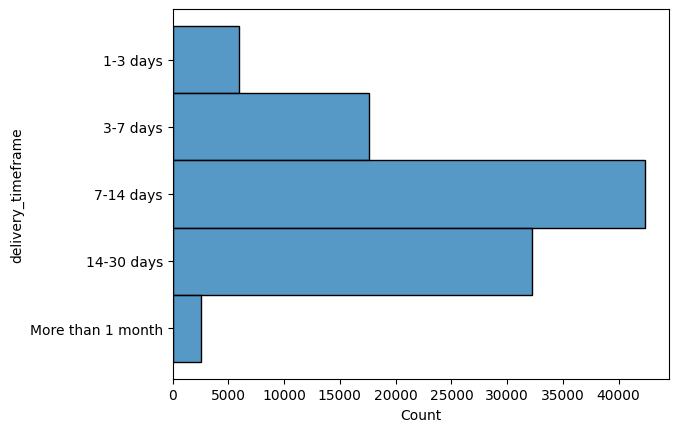

In [15]:
sns.histplot(y=early)

In early-delivery category, most orders are received by customer within 7-14 days timeframe.

In [16]:
delayed_delivery=order_delivered[
    (order_delivered['delivery_timeframe']!= 'unknown') &
    (order_delivered['delivery_timeframe'] < 0)
]
delayed_delivery['delivery_timeframe']=delayed_delivery['delivery_timeframe'].abs()

C:\Users\mabeteng\AppData\Local\Temp\ipykernel_984\1876757605.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
delayed_delivery

order_id                       customer_id  \
14      6552ae78f1de31bcde1fc2cfcab0d25d  ccb212cf6faf1356d9b5509259de0940   
33      fc74153e0ac39bb68c8f8f9e4758f001  787c8dad81798b72c5ae7d0ed526192e   
34      bb535f122a301b2b48f02befcedfcad5  5fa3e7405bd851a51f1e1aa56fc145a0   
43      f7f0b79050e7ef0b1cf7ffceb0aa114a  46fb8cff647939aaf32c4ab5be554501   
48      591d010258be8e3bc48d82503022a507  c46809cdeaa8e5698a9169c27de52b7b   
...                                  ...                               ...   
113116  fbffb0b287b62d10b5a1c24a29ae16ea  0a952ecdee3346648d2dca69c55853d1   
113123  4a4ded48a84c0cee9a190dd22ce96866  2b22da03dd8511de17c84238e49082f9   
113143  25d2bfa43663a23586afd12f15b542e7  9d8c06734fde9823ace11a4b5929b5a7   
113148  76a948cd55bf22799753720d4545dd2d  3f20a07b28aa252d0502fe7f7eb030a9   
113178  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   

       order_status order_purchase_timestamp order_delivered_customer_date  \
14        delivered      2018-05-17 14:05:28           2018-06-18 20:34:58   
33        delivered      2018-04-12 12:40:46           2018-06-29 17:03:25   
34        delivered      2017-08-03 11:36:18           2017-09-18 18:24:48   
43        delivered      2018-08-04 14:40:31           2018-08-14 15:08:57   
48        delivered      2018-05-22 13:04:15           2018-06-07 19:52:40   
...             ...                      ...                           ...   
113116    delivered      2017-09-26 10:51:26           2017-10-19 00:08:00   
113123    delivered      2017-12-28 21:32:44           2018-02-25 14:54:29   
113143    delivered      2018-05-22 21:13:21           2018-06-12 23:11:29   
113148    delivered      2018-01-30 02:41:30           2018-03-18 20:08:50   
113178    delivered      2017-12-20 09:52:41           2018-01-26 15:45:14   

        delivery_timeframe  order_item_id                        product_id  \
14                    12.0              1  595fac2a385ac33a80bd5114aec74eb8   
33                    50.0              1  595fac2a385ac33a80bd5114aec74eb8   
34                    25.0              1  595fac2a385ac33a80bd5114aec74eb8   
43                     5.0              1  595fac2a385ac33a80bd5114aec74eb8   
48                     4.0              1  595fac2a385ac33a80bd5114aec74eb8   
...                    ...            ...                               ...   
113116                 9.0              1  f0a06cc25ae22358b10378bf4dafdf0a   
113123                27.0              1  11ebbade0d9bf72ea23f49ef78f4b6b8   
113143                 5.0              1  6e1c2008dea1929b9b6c27fa01381e90   
113148                17.0              1  f81d3acffbaeeafa6f2a1a2f6d4a41ff   
113178                 9.0              1  3d2c44374ee42b3003a470f3e937a2ea   

         price     product_category payment_type  \
14      119.90            perfumery  credit_card   
33      117.70            perfumery  credit_card   
34      142.50            perfumery  credit_card   
43      116.90            perfumery       boleto   
48      119.90            perfumery  credit_card   
...        ...                  ...          ...   
113116  128.80                 baby  credit_card   
113123   69.90       bed_bath_table       boleto   
113143  219.90      furniture_decor  credit_card   
113148   26.99            telephony       boleto   
113178   55.90  musical_instruments  credit_card   

                               review_id  review_score  \
14      f19f1dd1ba41b8aa068fac23e3f5261f             1   
33      237ec2d8031fa4fc3d6eb3c1825273ed             1   
34      12a9f249966e5caca7926c30c73b97cf             3   
43      999ce675f2f793a2360d9809a2b37252             4   
48      5c9edd8746d494ffa631c1e0f6f7a075             5   
...                                  ...           ...   
113116  b52b04b2840b803c3444647a39aca439             3   
113123  c429a534b9bf33d921930e8e7f8f4719             1   
113143  ec2817e750153dfdd61894780dfc5d9e             4   
1131

In [18]:
delayed_delivery.shape

(8569, 16)

In [19]:
bins = [0, 3, 7, 14, 30, 300]
group_names = [
    '1-3 days', '3-7 days', '7-14 days', '14-30 days', 'More than 3 months'
]
delay = pd.cut(delayed_delivery['delivery_timeframe'] ,bins=bins, labels=group_names,include_lowest=True)
delay


14                 7-14 days
33        More than 3 months
34                14-30 days
43                  3-7 days
48                  3-7 days
                 ...        
113116             7-14 days
113123            14-30 days
113143              3-7 days
113148            14-30 days
113178             7-14 days
Name: delivery_timeframe, Length: 8569, dtype: category
Categories (5, object): ['1-3 days' < '3-7 days' < '7-14 days' < '14-30 days' < 'More than 3 months']

<Axes: xlabel='Count', ylabel='delivery_timeframe'>

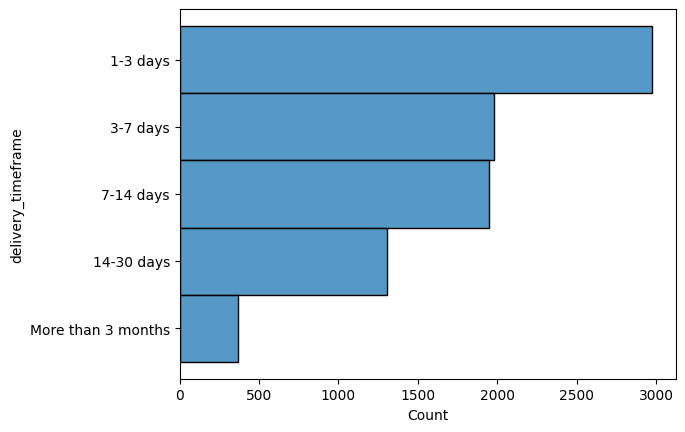

In [20]:
sns.histplot(y=delay)

In delay-delivery category, most orders are delayed by 1-3 days timeframe.

In [21]:
#Percent of delivery categories
accurate_delivery=order_delivered[
    (order_delivered['delivery_timeframe']!= 'unknown') &
    (order_delivered['delivery_timeframe'] == 0)
]

total_orders = order_delivered.shape[0]
accurate_deliveries = accurate_delivery.shape[0]
early_deliveries = early_delivery.shape[0]
delayed_deliveries = delayed_delivery.shape[0]

percentages = {
    "accurate": round((accurate_deliveries / total_orders) * 100, 0),
    "early": round((early_deliveries / total_orders) * 100, 0),
    "delayed": round((delayed_deliveries / total_orders) * 100, 0)
}

for category, percentage in percentages.items():
    print(f"Percentage of {category} deliveries: {percentage}%")



Percentage of accurate deliveries: 1.0%
Percentage of early deliveries: 91.0%
Percentage of delayed deliveries: 8.0%


91% of shipments arrive ahead of schedule, 1.0% arrive exactly on the estimated delivery date, and 8% are delayed. While early deliveries may not impact customer satisfaction, they highlight inaccuracies in the estiamted delivery tool.

## Geographic Distribution of Late Shipments

In [22]:
#Dataset with only late shipments
delayed_delivery=delayed_delivery[['order_id','delivery_timeframe']]
df1=df1[['geolocation_zip_code_prefix','geolocation_lat','geolocation_lng','order_id']]
df1_delayed=pd.merge(delayed_delivery,df1,on='order_id')

df1_delayed_areas=df1_delayed.groupby('geolocation_zip_code_prefix').agg({
        'geolocation_lat':'median',
        'geolocation_lng':'median',
        'delivery_timeframe':'mean'
})

df1_delayed_areas

geolocation_lat  geolocation_lng  \
geolocation_zip_code_prefix                                     
1009                              -23.546341       -46.636239   
1030                              -23.539670       -46.632972   
1037                              -23.545621       -46.639292   
1042                              -23.544874       -46.640380   
1043                              -23.545651       -46.641466   
...                                      ...              ...   
99704                             -27.641166       -52.257147   
99840                             -27.950216       -51.809302   
99870                             -27.772745       -51.595591   
99880                             -27.567702       -51.668176   
99900                             -27.886022       -52.227659   

                             delivery_timeframe  
geolocation_zip_code_prefix                      
1009                                        4.0  
1030                                        1.0  
1037                                        2.0  
1042                                        3.0  
1043                                        4.0  
...                                         ...  
99704                                       2.0  
99840                                       7.0  
99870                                      10.0  
99880                                      30.0  
99900                                       1.0  

[4639 rows x 3 columns]

In [23]:
fig = px.density_mapbox(df1_delayed_areas, lat='geolocation_lat', lon='geolocation_lng', z='delivery_timeframe', radius=10,
                        center=dict(lat=0, lon=180), zoom=1,
                        mapbox_style="open-street-map", title="Geographic View of Late Shipments")
fig.show()

Areas with high rate of late shipments are approximately at:
1. lat:-23, lng:-46
2. lat:-22, lng: -43
3. lat:-19, lng: -44
4. lat:-30, lng:-51
5. lat:-12, lng:-38
6. lat:-8, lng:-35
7. lat:-3, lng:-38

## Purchase Pattern Analysis

In [24]:
df2['order_purchase_timestamp'] = pd.to_datetime(df2['order_purchase_timestamp'])

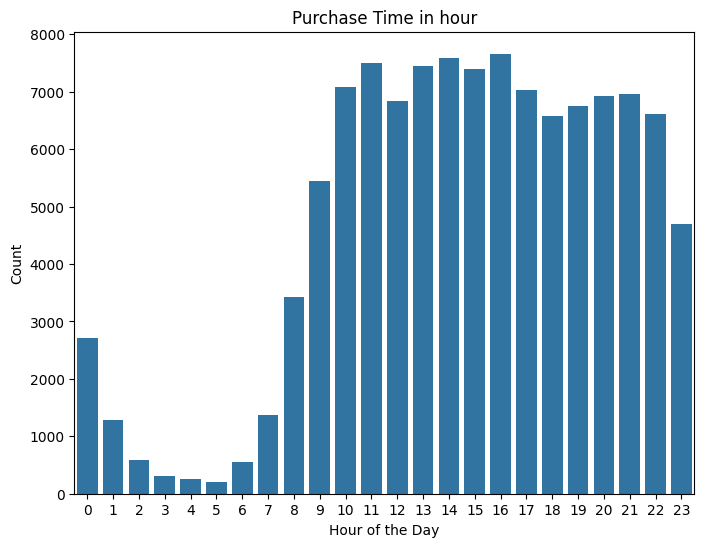

In [25]:
# Extract the hour of the day from the order_purchase_timestamp column
purchase_hour=(df2.order_purchase_timestamp).dt.hour

# Plot the distribution of hours using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x=purchase_hour)
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Purchase Time in hour')


plt.show()

It appears that most purchases made are between 1000 to 2200 hours.

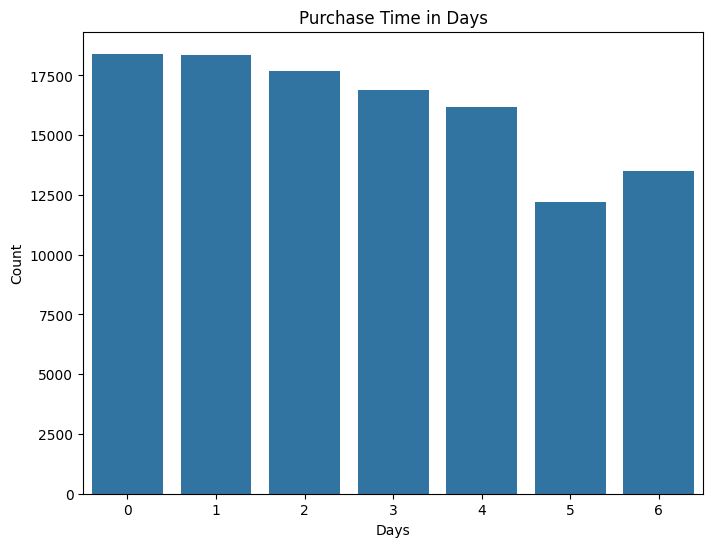

In [26]:
# Extract the days from the order_purchase_timestamp column
best_day=(df2.order_purchase_timestamp).dt.day_of_week


# Plot the distribution of hours using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x=best_day)
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Purchase Time in Days')
plt.show()

Monday (Day 0) and Tuesday (Day 1) shows the highest amount of purchases by customers, while Saturday (Day 5) shows the lowest.

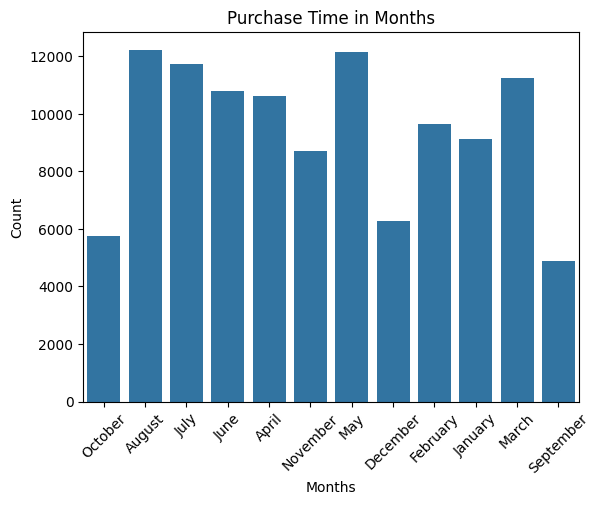

In [27]:
best_month=(df2.order_purchase_timestamp).dt.month_name()


sns.countplot(x=best_month)
plt.xlabel('Months')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Purchase Time in Months')
plt.show()

May and August shows the highest count of purchases while month of September and October shows the lowest.

## Payment Method Preferences

In [28]:
# Group by payment_type and calculate the number of orders and average order value
payment_analysis = df2.groupby('payment_type').agg(
    order_count=('order_id', 'count'),
    average_order_value=('price', 'mean')
).reset_index()

payment_analysis

payment_type  order_count  average_order_value
0       boleto        22510           104.095290
1  credit_card        84951           125.837807
2   debit_card         1658           108.935253
3      voucher         4062            99.458634

Credit card has the highest average order value of 125.8$, indicating customers tend to use credit cards when making larger purchases. Boleto, voucher and debit card have roughly the same AOV.

Credit card is the most preferred payment choice for orders, followed by boleto and debit cards, indicating most transactions done on the platform are via credit cards. Vouchers are the least preferred choice.

## Product Popularity

In [29]:
# Top 10 most reviewed products
product_reviews = df2.groupby(['product_id', 'product_category']).agg(
    review_count=('review_id', 'count')
).reset_index()

popular_products = product_reviews.sort_values(by='review_count', ascending=False)
popular_products.head(10)


product_id       product_category  review_count
21607  aca2eb7d00ea1a7b8ebd4e68314663af        furniture_decor           528
8402   422879e10f46682990de24d770e7f83d           garden_tools           499
19287  99a4788cb24856965c36a24e339b6058         bed_bath_table           499
7184   389d119b48cf3043d311335e499d9c6b           garden_tools           399
6906   368c6c730842d78016ad823897a372db           garden_tools           394
10577  53759a2ecddad2bb87a079a1f1519f73           garden_tools           378
26411  d1c427060a0f73f6b889a5c7c61f2ac4  computers_accessories           342
10603  53b36df67ebb7c41585e8d54d6772e08          watches_gifts           324
2729   154e7e31ebfa092203795c972e5804a6          health_beauty           294
7854   3dd2a17168ec895c781a9191c1e95ad7  computers_accessories           276

Furniture decor is the most popular product category with the highest reviews submitted, indicating many traction from customers to purchasing furniture on the platform.

## High-Value Customers

                     customer_unique_id  total_revenue  purchase_frequency
3724   0a0a92112bd4c708ca5fde585afaa872        13440.0                   8
79680  da122df9eeddfedc1dc1f5349a1a690c         7388.0                   2
43207  763c8b1c9c68a0229c42c9fc6f662b93         7160.0                   4
80501  dc4802a71eae9be1dd28f5d788ceb526         6735.0                   1
93119  ff4159b92c40ebe40454e3e6a7c35ed6         6499.0                   1
44826  7a96eb0a685f5c19b7dad29fc802aa64         6248.0                   2
23445  4007669dec559734d6f53e029e360987         5934.6                   6
35437  60b2ec19b8c18082cdb5180106a97cb5         5298.0                   2
87184  eebb5dda148d3893cdaf5b5ca3040ccb         4690.0                   1
34097  5d0a2980b292d049061542014e8960bf         4599.9                   2


C:\Users\mabeteng\AppData\Local\Temp\ipykernel_984\1034851210.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='total_revenue', ylabel='customer_unique_id'>

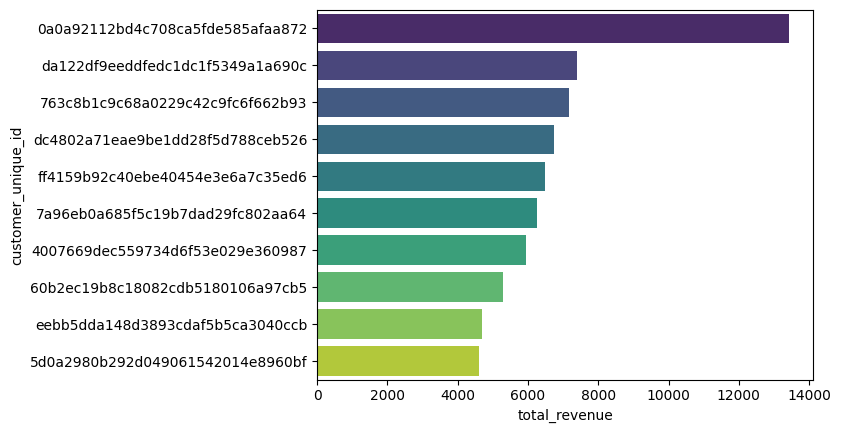

In [30]:
customer_revenue = df2.groupby('customer_unique_id')['price'].sum().reset_index()
customer_revenue.columns = ['customer_unique_id', 'total_revenue']

customer_frequency = df2.groupby('customer_unique_id')['order_id'].count().reset_index()
customer_frequency.columns = ['customer_unique_id', 'purchase_frequency']

customer_value = pd.merge(customer_revenue, customer_frequency, on='customer_unique_id')

high_value_threshold = customer_value['total_revenue'].quantile(0.80)
high_value_customers = customer_value[customer_value['total_revenue'] >= high_value_threshold]
high_value_customers_sorted = high_value_customers.sort_values(by='total_revenue', ascending=False).head(10)
print(high_value_customers_sorted.head(10))

sns.barplot(x='total_revenue', y='customer_unique_id', data=high_value_customers_sorted, palette='viridis')

It can be concluded that Oa0a92112bd4c708ca5fde585afaa872 is the most valued customer, as raking up to close to 14000$ in revenue for the last 3 years.

## Review and Feedback Analysis

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mabeteng\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

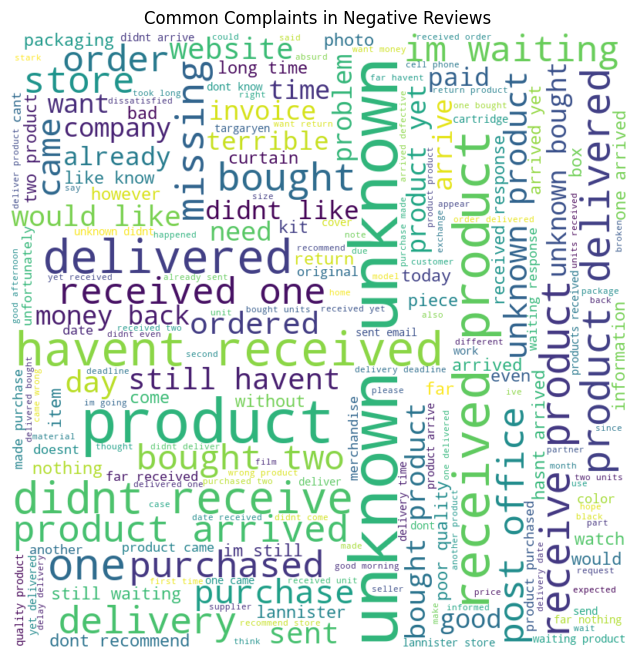

In [32]:
def preprocess_text(text):
    text=text.lower()

    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    words=word_tokenize(text)

    # Load English stopwords
    english_stopwords = set(stopwords.words('english'))
    words= [word for word in words if word not in english_stopwords]

    return " ".join(words)

negative_reviews=df2[df2['review_type']=='Negative']
negative_reviews=negative_reviews[['review_comment']]

negative_reviews_clean=negative_reviews['review_comment'].apply(preprocess_text)
all_negative_text=" ".join(negative_reviews_clean)

stop_words=set(stopwords.words('english'))
wordcloud=WordCloud(width=800,
                    height=800,
                    stopwords=stop_words,
                    background_color='white',
                    min_font_size=10).generate(all_negative_text)

plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Complaints in Negative Reviews')
plt.show()

From the wordcloud above, the more common complaints includes touching the topic of delivery issues, product, store and etc.